#### [학습에 필요한 모듈 선언]

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.utils import shuffle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
# requests import error 발생시  pip install requests 로 설치
import requests

from datetime import datetime

#### [환경설정]

In [2]:
# 학습 데이터(훈련/테스트) 비율
trainDataRate = 0.7
# 학습률
learningRate = 0.01
# 총 학습 횟수
totalStep = 10001
# 데이터 섞기
shuffleOn = True
# 학습 데이터 파일명 지정
fileName = "IrisData.csv"
# 학습 데이터 경로 지정
currentFolderPath = os.getcwd()
dataSetFolderPath = os.path.join(currentFolderPath, 'dataset')
datasetFilePath = os.path.join(dataSetFolderPath, fileName)

# [Saver] 모델 데이터를 저장하기 위한 폴더 확인 및 모델 이름 정하기

In [3]:
#생성한 모델 폴더를 구분하기 위한 현재 시간을 폴더 이름에 추가함
now = datetime.now()
timeLabel = "{0}{1:0>2}{2:0>2}_{3}{4}{5}".format(now.year, now.month, now.day, now.hour, now.minute, now.second)

#model 폴더가 존재하는지 체크 
modelFolderName = 'model'
modelFileName = 'model_'+timeLabel

if os.path.exists(modelFolderName):
    print("> 'model' folder is exist.")
else:
    print("> 'model' folder is not exist, Create 'model' folder.")
    os.mkdir('model')

# 모델을 저장하기 위한 경로 지정
# 만약 폴더 안에 모델 파일을 저장한다면 폴더는 미리 생성하던지 아니면 코드로 생성하고 모델을 저장해야함
# .ckpt 확장자는 checkpoint의 약자임
save_file = './model/'+modelFileName+'.ckpt'
print("Saved file path : "+save_file)
# 만약 폴더 안에 모델 파일을 저장한다면 폴더는 미리 생성하던지 아니면 코드로 생성하고 모델을 저장해야함

> 'model' folder is exist.
Saved file path : ./model/model_20190703_154851.ckpt


#### [빌드단계] Step 1) 학습 데이터 준비

> 'dataset' folder is exist.
===== Data =====>
     sepalLength  sepalWidth  petalLength  petalWidth          species
149          5.9         3.0          5.1         1.8   Iris-virginica
76           6.8         2.8          4.8         1.4  Iris-versicolor
92           5.8         2.6          4.0         1.2  Iris-versicolor
146          6.3         2.5          5.0         1.9   Iris-virginica
52           6.9         3.1          4.9         1.5  Iris-versicolor
    sepalLength  sepalWidth  petalLength  petalWidth          species
19          5.1         3.8          1.5         0.3      Iris-setosa
90          5.5         2.6          4.4         1.2  Iris-versicolor
73          6.1         2.8          4.7         1.2  Iris-versicolor
38          4.4         3.0          1.3         0.2      Iris-setosa
75          6.6         3.0          4.4         1.4  Iris-versicolor
Shape : (150, 5)
Specis : 
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species,

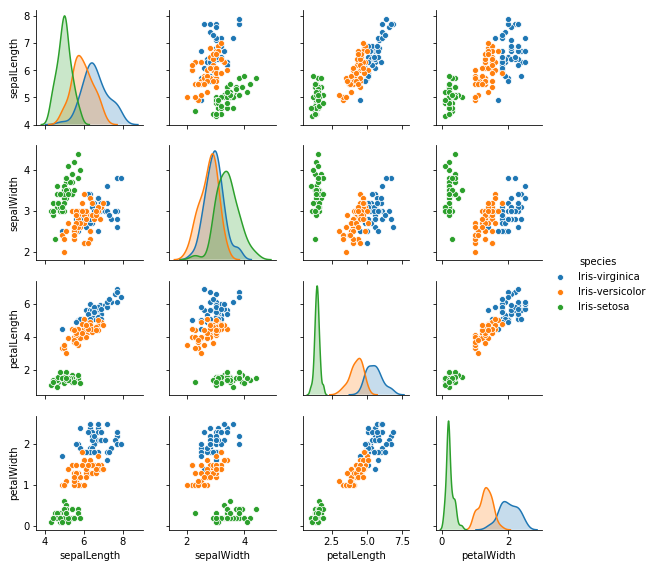

In [4]:
# 데이터셋 저장할 폴더 존재 유무 확인
if os.path.exists(dataSetFolderPath):
    print("> 'dataset' folder is exist.")
else:
    print("> 'dataset' folder is not exist, Create 'dataset' folder.")
    os.mkdir('dataset')

### (1) 데이터 읽어오기
# 해당 경로에 학습 데이터가 없으면 다운로드
if os.path.exists(datasetFilePath) is not True:
    print("#===== Download Iris Data =====#")
    # iris 데이터 셋 다운로드
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    req = requests.get(url, allow_redirects = True)
    # 학습데이터 저장
    open(datasetFilePath, "wb").write(req.content)
    print("#===== Download Completed =====#")

# pandas를 이용하여 CSV 파일 데이터 읽기
allColumnName = ["sepalLength","sepalWidth","petalLength","petalWidth","species"]

# column이 없는 데이터라서 파일을 읽어올때 header 를 생성하지 않고 column을 추가
if shuffleOn :
    df = shuffle(pd.read_csv(datasetFilePath, header = None, names = allColumnName))
else :
    df = pd.read_csv(datasetFilePath, header = None, names = allColumnName)


# 학습 데이터 확인
print("===== Data =====>")
print(df.head())
print(df.tail())
# 학습 데이터 shape 확인
print("Shape : {}".format(df.shape))
# 학습 데이터 결과 갯수 확인
print("Specis : \n{}".format(df["species"].value_counts()))


# 학습 데이터 전체 그래프
sns.pairplot(df, hue="species", height = 2)
plt.show()


In [5]:
### (2) 범주형 데이터 맴핑 선언
# species 를 3가지 종류로 나눈 dataframe 으로 변환
df_one_hot_encoded = pd.get_dummies(df)

print("===== after mapping =====>")
print(df_one_hot_encoded.head())
print(df_one_hot_encoded.tail())


===== after mapping =====>
     sepalLength  sepalWidth  petalLength  petalWidth  species_Iris-setosa  \
149          5.9         3.0          5.1         1.8                    0   
76           6.8         2.8          4.8         1.4                    0   
92           5.8         2.6          4.0         1.2                    0   
146          6.3         2.5          5.0         1.9                    0   
52           6.9         3.1          4.9         1.5                    0   

     species_Iris-versicolor  species_Iris-virginica  
149                        0                       1  
76                         1                       0  
92                         1                       0  
146                        0                       1  
52                         1                       0  
    sepalLength  sepalWidth  petalLength  petalWidth  species_Iris-setosa  \
19          5.1         3.8          1.5         0.3                    1   
90          5.5     

In [6]:
### (3) 훈련, 테스트 데이터 나누기
# 학습 데이터 리스트로 변환
# 훈련 데이터를 정해진 비율만큼 추출
df_trainData = df_one_hot_encoded.sample(frac = trainDataRate)

# 훈련 데이터를 제거한 나머지 데이터를 테스트 테이터로 지정
df_testData = df_one_hot_encoded.drop(df_trainData.index)

# 학습데이터와 결과데이터의 컬럼 선언
featureColumnName = ["sepalLength","sepalWidth","petalLength","petalWidth"]
resultColumnName = ['species_Iris-setosa','species_Iris-versicolor','species_Iris-virginica']
# 학습데이터 선언
xTrainDataList = df_trainData.filter(featureColumnName)
yTrainDataList = df_trainData.filter(resultColumnName)
# 테스트 데이터 선언
xTestDataList = df_testData.filter(featureColumnName)
yTestDataList = df_testData.filter(resultColumnName)

print("[TrainData Size] x : {}, y :{}".format(len(xTrainDataList),len(yTrainDataList)))
print("[TestData Size] x : {}, y :{}".format(len(xTestDataList),len(yTestDataList)))

[TrainData Size] x : 105, y :105
[TestData Size] x : 45, y :45


#### [빌드단계] Step 2) 모델 생성을 위한 변수 초기화

In [7]:
# feature 로 사용할 데이터 갯수
feature_num = len(featureColumnName)
# result 로 사용할 종류 갯수
result_num = len(resultColumnName)

# 학습데이터가 들어갈 플레이스 홀더 선언
X = tf.placeholder(tf.float32, shape = [None, feature_num], name='X')
# 학습데이터가 들어갈 플레이스 홀더 선언
Y = tf.placeholder(tf.float32, shape = [None, result_num], name='Y')


# Weight 변수 선언
W = tf.Variable(tf.zeros([feature_num, result_num]), name='Weight')
# Bias 변수 선언
b = tf.Variable(tf.zeros([result_num]), name='bias')

# [Saver] saver 객체 생성
* max_to_keep => 학습시 특정 시점에 모델을 저장한 ckpt파일이 저장되는 갯수(default : 5)
* max_to_keep=None 일 경우 모두 저장함

In [8]:
allVariablesSave = True

if allVariablesSave : 
    # 모든 Variables 저장
    saver = tf.train.Saver(max_to_keep=None)
else:    
    # 선택한 Variable 만 저장하도록 saver 선언
    saver_param = [W, b]
    saver = tf.train.Saver(saver_param, max_to_keep=None)

#### [빌드단계] 3) 학습 모델 그래프 구성

In [9]:
# 3-1) 학습데이터를 대표 하는 가설 그래프 선언
hypothesis = tf.nn.softmax(logits= tf.matmul(X, W) + b, name='hypothesis')

# 3-2) 비용함수(오차함수,손실함수) 선언
costFunction = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1), name='costFunction')

# 3-3) 비용함수의 값이 최소가 되도록 하는 최적화함수 선언
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
train = optimizer.minimize(costFunction)

#### [실행단계] 학습 모델 그래프를 실행

In [10]:
# 실행을 위한 세션 선언
sess = tf.Session()
# 최적화 과정을 통하여 구해질 변수 W,b 초기화
sess.run(tf.global_variables_initializer())

In [11]:
# 예측값, 정확도 수식 선언
predicted = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis =1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

In [12]:
# 학습, 테스트 정확도를 저장할 리스트 선언
train_accuracy = list()

# [Saver] 1000 학습시 모델 저장

--------------------------------------------------------------------------------
Train(Optimization) Start 
step : 0. cost : 1.0986120700836182, accuracy : 0.3523809611797333
INFO:tensorflow:./model/model_20190703_154851.ckpt-0 is not in all_model_checkpoint_paths. Manually adding it.
Save ckpt file :  ./model/model_20190703_154851.ckpt-0
step : 1000. cost : 0.36209434270858765, accuracy : 0.961904764175415
INFO:tensorflow:./model/model_20190703_154851.ckpt-1000 is not in all_model_checkpoint_paths. Manually adding it.
Save ckpt file :  ./model/model_20190703_154851.ckpt-1000
step : 2000. cost : 0.277774453163147, accuracy : 0.9714285731315613
INFO:tensorflow:./model/model_20190703_154851.ckpt-2000 is not in all_model_checkpoint_paths. Manually adding it.
Save ckpt file :  ./model/model_20190703_154851.ckpt-2000
step : 3000. cost : 0.23184776306152344, accuracy : 0.9714285731315613
INFO:tensorflow:./model/model_20190703_154851.ckpt-3000 is not in all_model_checkpoint_paths. Manually ad

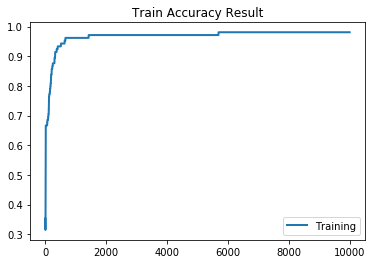

Train Finished
--------------------------------------------------------------------------------
[Test Result]

Hypothesis : [[2.17959168e-04 1.68295935e-01 8.31486106e-01]
 [1.22693004e-02 9.31424260e-01 5.63064218e-02]
 [1.87623573e-05 1.08458884e-01 8.91522288e-01]
 [1.15881336e-03 3.83514643e-01 6.15326464e-01]
 [9.70208704e-01 2.97911670e-02 1.44965497e-07]
 [7.73651209e-06 3.11127864e-02 9.68879461e-01]
 [1.27226161e-02 9.32442188e-01 5.48351072e-02]
 [5.60142216e-05 1.02545075e-01 8.97398949e-01]
 [4.86808631e-06 2.17810255e-02 9.78214145e-01]
 [9.85652328e-01 1.43476259e-02 1.67730949e-08]
 [7.86637422e-03 8.30598891e-01 1.61534727e-01]
 [9.86068130e-01 1.39319049e-02 1.31769129e-08]
 [9.74323988e-01 2.56759413e-02 5.91848632e-08]
 [1.19929891e-02 8.91560376e-01 9.64465886e-02]
 [9.19811555e-06 7.40865692e-02 9.25904214e-01]
 [4.65112622e-04 4.78387177e-01 5.21147668e-01]
 [1.20679168e-02 9.56120908e-01 3.18111330e-02]
 [2.88899685e-03 7.68131554e-01 2.28979439e-01]
 [1.37288471

In [13]:
print("--------------------------------------------------------------------------------")
print("Train(Optimization) Start ")

for step in range(totalStep):
    # X, Y에 학습데이터 입력하여 비용함수, W, b, accuracy, train을 실행
    cost_val, W_val, b_val, acc_val, _ = sess.run([costFunction, W, b, accuracy, train],
                                            feed_dict = {X: xTrainDataList, Y: yTrainDataList})
    train_accuracy.append(acc_val)

    if step % 1000 == 0:
        print("step : {}. cost : {}, accuracy : {}".format(step, cost_val, acc_val))
        # 학습이 1000번 수행 될때 마다 저장
        ckpt_path = saver.save(sess, save_file, step)
        print("Save ckpt file : ",ckpt_path)
        
        
    if step == totalStep-1 :
        print("W : {}\nb:{}".format(W_val, b_val))
    


# matplotlib 를 이용하여 결과를 시각화
# 정확도 결과 확인 그래프
plt.plot(range(len(train_accuracy)), train_accuracy, linewidth = 2, label = 'Training')
plt.legend()
plt.title("Train Accuracy Result")
plt.show()


print("Train Finished")
print("--------------------------------------------------------------------------------")
print("[Test Result]")
# 최적화가 끝난 학습 모델 테스트
h_val, p_val, a_val = sess.run([hypothesis, predicted, accuracy],
                    feed_dict={X: xTestDataList, Y: yTestDataList})
print("\nHypothesis : {} \nPrediction : {} \nAccuracy : {}".format(h_val,p_val,a_val))
print("--------------------------------------------------------------------------------")

#세션종료
sess.close()